In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.InteractiveSession()

In [3]:
a = tf.zeros((2, 2))
b = tf.ones((2, 2))

In [4]:
tf.reduce_sum(b, axis=1).eval()

array([ 2.,  2.], dtype=float32)

In [5]:
tf.reduce_sum(b, axis=1)

<tf.Tensor 'Sum_1:0' shape=(2,) dtype=float32>

In [8]:
a.shape

TensorShape([Dimension(2), Dimension(2)])

In [13]:
tf.reshape(a, (-1, 1)).eval()

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [15]:
tf.reshape(a, (-1,)).eval()

array([ 0.,  0.,  0.,  0.], dtype=float32)

In [16]:
a

<tf.Tensor 'zeros:0' shape=(2, 2) dtype=float32>

In [17]:
a.eval()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [26]:
a = tf.constant(1)
b = tf.constant(5)
c = a * b

with tf.Session() as sess:
    print(c.eval())
    print(sess.run(c))

5
5


In [27]:
c

<tf.Tensor 'mul_1:0' shape=() dtype=int32>

In [28]:
c.eval()

5

In [29]:
a.eval()

1

In [30]:
w = tf.Variable(tf.ones((2, 2)), name='weights')
w

<tf.Variable 'weights:0' shape=(2, 2) dtype=float32_ref>

In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))
    print('---------')
    print(w.eval())

[[ 1.  1.]
 [ 1.  1.]]
---------
[[ 1.  1.]
 [ 1.  1.]]


In [37]:
rw = tf.Variable(tf.random_normal((2, 2)), name='random_weights')

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(rw))

[[ 1.95472836  0.52403891]
 [ 1.82574213  0.17203975]]


In [50]:
var_1 = tf.Variable(0, name='var1')

add_op = tf.add(var_1, tf.constant(1))

upd_op = tf.assign(var_1, add_op)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(upd_op.eval()) 

1
2
3
4
5


In [55]:
x = tf.constant(1)
y = tf.constant(5)
z = tf.constant(7)

mul_xy = x * y
final_op = mul_xy + z

with tf.Session() as sess:
    print(sess.run([mul_xy, final_op]))
    

[5, 12]


In [59]:
a = np.ones((3, 3))
b = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(b))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [63]:
A = tf.placeholder(tf.float32, shape=(1, 2), name='A')
B = tf.placeholder(tf.float32, shape=(2, 1), name='B')

AB = tf.matmul(A, B)

with tf.Session() as sess:
    print(sess.run([AB], feed_dict={A:[[1., 3.]], B:[[1], [3]]}))

[array([[ 10.]], dtype=float32)]


### XOR Implementation Using TensorFlow

In [81]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 2), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='Y')

w1 = tf.Variable(tf.random_uniform((2, 2), -1, 1), name='w1')
w2 = tf.Variable(tf.random_uniform((2, 1), -1, 1), name='w2')

b1 = tf.Variable(tf.zeros([2]), name='b1')
b2 = tf.Variable(tf.zeros([1]), name='b2')

z1 = tf.add(tf.matmul(X, w1), b1, name='z1')
a1 = tf.sigmoid(z1, name='a1')

z2 = tf.add(tf.matmul(a1, w2), b2, name='z2')
a2 = tf.sigmoid(z2, name='a2')

cost = tf.reduce_mean(-(Y * tf.log(a2) + (1 - Y)*tf.log(1 - a2)), name='cost')

learning_rate = .01

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

data_dict = {X: [[0, 0], [0, 1], [1, 0], [1, 1]], Y:[[0], [1], [1], [0]]}


init = tf.global_variables_initializer()
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./XOR_logs', sess.graph)
    sess.run(init)
    for i in range(100000):
        sess.run(train_op, feed_dict=data_dict)
        
    print('Final Prediction\n{}'.format(sess.run(a2, feed_dict=data_dict)))

Final Prediction
[[ 0.03871545]
 [ 0.94456911]
 [ 0.96848285]
 [ 0.03222037]]


### XOR Implementation (linear activation for hidden layers)

In [84]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 2), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='Y')

W1 = tf.Variable(tf.random_uniform((2, 2), -1., 1.), name='W1')
W2 = tf.Variable(tf.random_uniform((2, 1), -1., 1.), name='W2')

b1 = tf.Variable(tf.zeros(shape=([2])), name='b1')
b2 = tf.Variable(tf.zeros(shape=([1])), name='b2')

z1 = tf.add(tf.matmul(X, W1), b1, name='z1')
z2 = tf.add(tf.matmul(z1, W2), b2, name='z2')
a2 = tf.sigmoid(z2, name='a2')

cost = tf.reduce_mean(-(Y*tf.log(a2) + (1. - Y)*tf.log(1. - a2)), name='cost')

learning_rate = .01
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()


data_dict = {X: [[0, 0], [0, 1], [1, 0], [1, 1]], Y:[[0], [1], [1], [0]]}

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./XOR_logs/', sess.graph)
    sess.run(init)
    for i in range(100000):
        sess.run(train_op, feed_dict=data_dict)
    
    print('Final Prediction\n{}'.format(sess.run(a2, feed_dict=data_dict)))
    

Final Prediction
[[ 0.5       ]
 [ 0.49999994]
 [ 0.50000006]
 [ 0.5       ]]


### Linear Regression in TensorFlow

In [11]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [12]:
# preprocessing data

# load data
data = load_boston()

boston_X = data.data
boston_y = data.target

# normalize features
sc = StandardScaler()
boston_X = sc.fit_transform(boston_X)

# add bias columns
n_samples, n_features = boston_X.shape
boston_X = np.c_[np.ones(n_samples), boston_X]
boston_Y = boston_y.reshape(-1, 1)

In [13]:
boston_X.shape, boston_Y.shape

((506, 14), (506, 1))

In [21]:
m, n_x = boston_X.shape

tf.reset_default_graph()
# construct model 
X = tf.placeholder(dtype=tf.float32, shape=(None, n_x), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='Y')

W = tf.Variable(tf.random_uniform(shape=(n_x, 1), minval=-1, maxval=1), name='W')

pred = tf.matmul(X, W)
error = pred - Y
cost = tf.reduce_mean(tf.square(error))

eta = .01
epochs = 1000
cost_trace = []
train_op = tf.train.GradientDescentOptimizer(eta).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        _, c = sess.run([train_op, cost], feed_dict={X:boston_X, Y:boston_Y})
        cost_trace.append(c)
    
    print("final MSE in training: {:.4f}".format(cost_trace[-1]))
    
    Y_pred = sess.run(pred, feed_dict={X:boston_X})

final MSE in training: 21.9311


Text(0,0.5,'MSE')

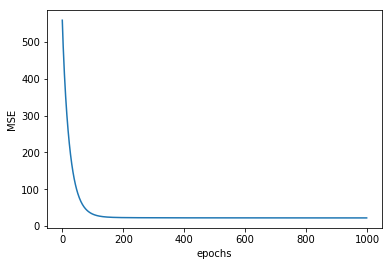

In [22]:
plt.plot(cost_trace)
plt.xlabel('epochs')
plt.ylabel('MSE')

Text(0,0.5,'prediction')

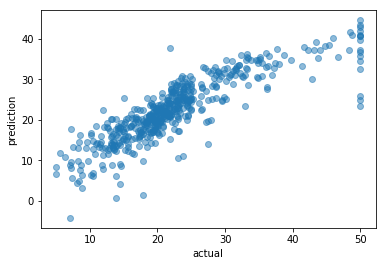

In [24]:
plt.plot(boston_Y.ravel(), Y_pred.ravel(), 'o', alpha=.5)
plt.xlabel('actual')
plt.ylabel('prediction')

### Multi-class Classification with SorfMax Function using Batch Gradient Descent

In [25]:
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

In [29]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

In [40]:
# construct model
tf.reset_default_graph()

m, n_x = X_train.shape
_, n_y = Y_train.shape

# init variables
X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None, n_y], name='Y')
W = tf.get_variable(name='W', shape=[n_x, n_y], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b = tf.Variable(tf.zeros(shape=(n_y)), name='b')

# forward pass
learning_rate = .01
epochs = 1000

Z = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z, labels=Y))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        sess.run(train_op, feed_dict={X:X_train, Y:Y_train})
        
        if (i % 100 == 0) or (i == epochs-1):
            c = sess.run(cost, feed_dict={X:X_train, Y:Y_train})
            a = np.mean(np.equal(np.argmax(Y_train, axis=1),
                                np.argmax(sess.run(Z, feed_dict={X:X_train}), axis=1)))
            print("Epoch {}: loss: {:.4f} accuracy: {:.4f}".format(i, c, a))
            
    test_pred = np.argmax(sess.run(Z, feed_dict={X:X_test}), axis=1)
    test_acc = np.mean(np.equal(np.argmax(Y_test, axis=1), test_pred))
    test_loss = sess.run(cost, feed_dict={X:X_test, Y:Y_test})
    print("Test set: loss: {:.4f} accuracy: {:.4f}".format(test_loss, test_acc))

Epoch 0: loss: 2.4486 accuracy: 0.0776
Epoch 100: loss: 1.5956 accuracy: 0.6663
Epoch 200: loss: 1.2166 accuracy: 0.7673
Epoch 300: loss: 1.0138 accuracy: 0.8026
Epoch 400: loss: 0.8904 accuracy: 0.8205
Epoch 500: loss: 0.8077 accuracy: 0.8315
Epoch 600: loss: 0.7481 accuracy: 0.8394
Epoch 700: loss: 0.7030 accuracy: 0.8458
Epoch 800: loss: 0.6676 accuracy: 0.8507
Epoch 900: loss: 0.6388 accuracy: 0.8543
Epoch 999: loss: 0.6152 accuracy: 0.8574
Test set: loss: 0.5876 accuracy: 0.8695


In [44]:
test_labels = np.argmax(Y_test, axis=1)

idx = test_pred != test_labels

X_miss = X_test[idx]

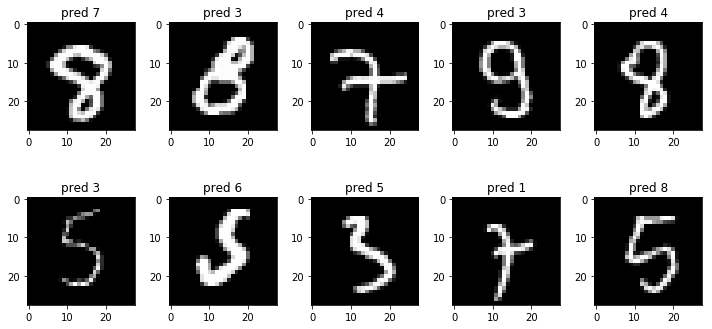

In [57]:
rand_idx = np.random.permutation(range(X_miss.shape[0]))[:10]

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))

for axi, i in zip(ax.flat, rand_idx):
    axi.imshow(X_miss[i].reshape(28, 28), cmap=plt.cm.gray)
    axi.set_title("pred {}".format(test_pred[idx][i]))
fig.tight_layout()

### Multi-class Classification with SoftMax Function Using mini-batch Gradient Descent

In [2]:
from tensorflow.examples.tutorials.mnist import input_data


In [3]:
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

In [12]:
# set parameters
learning_rate = 0.01
epochs = 1000
batch_size = 1000

tf.reset_default_graph()
# build model 
m_x, n_x = X_train.shape
m_y, n_y = Y_train.shape

# init variable
X = tf.placeholder(dtype=tf.float32, shape=(None, n_x), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, n_y), name='Y')
W = tf.Variable(tf.random_normal(shape=(n_x, n_y), mean=0.0, stddev=0.01), name='W')
b = tf.Variable(tf.zeros(shape=[n_y]), name='b')

# forward propagation
Z = tf.add(tf.matmul(X, W), b)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=Z))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# training
init = tf.global_variables_initializer()
epoch_loss = []
epoch_accuracy = []
n_batch = m_x // batch_size
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        total_cost = 0
        for j in range(n_batch):
            a, b = j*batch_size, (j+1)*batch_size
            sess.run(train_op, feed_dict={X:X_train[a:b], Y:Y_train[a:b]})
            a_cost = sess.run(cost, feed_dict={X:X_train[a:b], Y:Y_train[a:b]})
            total_cost += a_cost * X_train[a:b].shape[0]
            
        train_pred = sess.run(Z, feed_dict={X:X_train, Y:Y_train})
        train_acc = np.mean(np.equal(np.argmax(train_pred, axis=1), np.argmax(Y_train, axis=1)))
        epoch_loss.append(total_cost / m_x)
        epoch_accuracy.append(train_acc)
        
        if (i == epochs-1):
            print("Epoch Final: Average loss: {:.4f} accuracy: {:.4f}".format(epoch_loss[-1], epoch_accuracy[-1]))
        elif (i % 100 == 0):
            print("Epoch {}: Average loss: {:.4f} accuracy: {:.4f}".format(i, epoch_loss[-1], epoch_accuracy[-1]))
            
    test_cost = sess.run(cost, feed_dict={X:X_test, Y:Y_test})
    test_pred = sess.run(Z, feed_dict={X:X_test})
    test_acc = np.mean(np.equal(np.argmax(Y_test, axis=1), np.argmax(test_pred, axis=1)))
    print("Test set: Average loss: {:.4f} accuracy: {:.4f}".format(test_cost, test_acc))

Epoch 0: Average loss: 0.5301 accuracy: 0.9043
Epoch 100: Average loss: 0.2171 accuracy: 0.9389
Epoch 200: Average loss: 0.2122 accuracy: 0.9398
Epoch 300: Average loss: 0.2104 accuracy: 0.9400
Epoch 400: Average loss: 0.2096 accuracy: 0.9402
Epoch 500: Average loss: 0.2091 accuracy: 0.9405
Epoch 600: Average loss: 0.2088 accuracy: 0.9406
Epoch 700: Average loss: 0.2086 accuracy: 0.9406
Epoch 800: Average loss: 0.2084 accuracy: 0.9407
Epoch 900: Average loss: 0.2083 accuracy: 0.9408
Epoch Final: Average loss: 999.0000 accuracy: 0.2082
Test set: Average loss: 0.4593 accuracy: 0.9155
